<a href="https://colab.research.google.com/github/thargro5/Machine-Learning/blob/main/MLHW2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

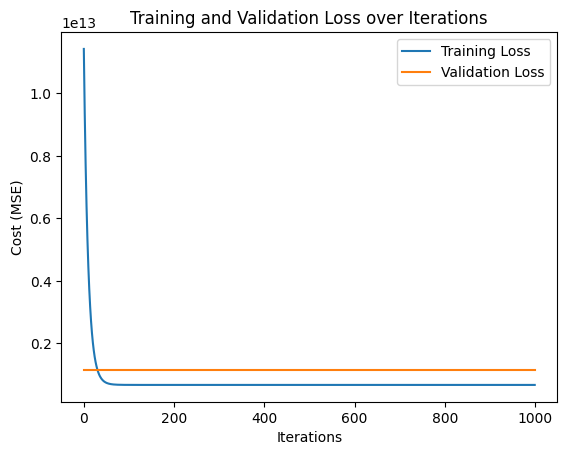

Final parameters (theta):
[4744533.74907449  669669.62933034  111527.30102236  595247.30781532
  429101.96588984  290656.73479686]


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# 1. Load the dataset from the CSV
url = 'https://github.com/HamedTabkhi/Intro-to-ML/raw/main/Dataset/Housing.csv'
data = pd.read_csv(url)

# 2. Select relevant features (input variables) and the target (price)
features = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking']
X = data[features].values
y = data['price'].values

# 3. Normalize the input features (StandardScaler will standardize the data)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 4. Add a column of ones to X_scaled for the intercept term (theta_0)
X_scaled = np.hstack((np.ones((X_scaled.shape[0], 1)), X_scaled))

# 5. Split data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# 6. Define the cost function (Mean Squared Error)
def compute_cost(X, y, theta):
    m = len(y)
    predictions = X.dot(theta)
    cost = (1 / (2 * m)) * np.sum(np.square(predictions - y))
    return cost

# 7. Implement gradient descent
def gradient_descent(X, y, theta, alpha, iterations):
    m = len(y)
    cost_history = []

    for i in range(iterations):
        predictions = X.dot(theta)
        errors = predictions - y
        theta -= (alpha / m) * X.T.dot(errors)
        cost = compute_cost(X, y, theta)
        cost_history.append(cost)

    return theta, cost_history

# 8. Initialize parameters
theta = np.zeros(X_train.shape[1])

# 9. Train the model with gradient descent (try different learning rates)
alpha = 0.05  # You can explore values between 0.1 and 0.01
iterations = 1000
theta, cost_history_train = gradient_descent(X_train, y_train, theta, alpha, iterations)

# 10. Compute validation loss over the iterations
def compute_validation_loss(X_val, y_val, theta):
    m = len(y_val)
    predictions = X_val.dot(theta)
    cost_val = (1 / (2 * m)) * np.sum(np.square(predictions - y_val))
    return cost_val

# Track validation loss
validation_loss_history = []
for i in range(iterations):
    val_loss = compute_validation_loss(X_val, y_val, theta)
    validation_loss_history.append(val_loss)

# 11. Plot the training and validation loss
plt.plot(range(iterations), cost_history_train, label='Training Loss')
plt.plot(range(iterations), validation_loss_history, label='Validation Loss')
plt.xlabel('Iterations')
plt.ylabel('Cost (MSE)')
plt.title('Training and Validation Loss over Iterations')
plt.legend()
plt.show()

# 12. Print the final learned parameters (theta)
print("Final parameters (theta):")
print(theta)

<ipython-input-20-fe85d35ede13>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[binary_features] = X[binary_features].replace({'yes': 1, 'no': 0})


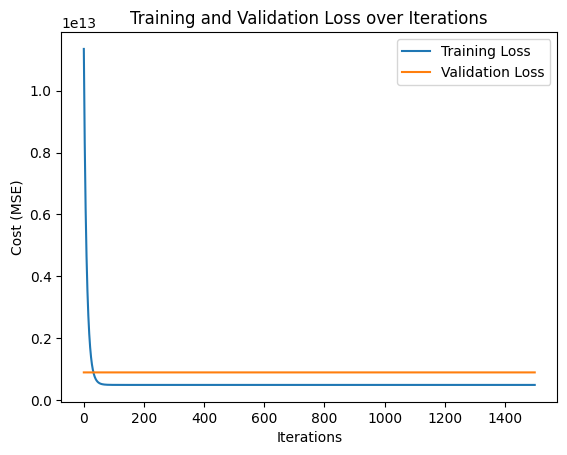

Final parameters (theta):
[4741436.23252571  515391.84048077   57872.77643642  556891.06724164
  370000.89986417  143741.72357996   93178.80728203  207547.04663858
  149010.39505059  375713.43953875  212997.79914707  269942.44162469]


In [20]:
# 2. Select relevant features and the target
features = ['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom', 'basement',
            'hotwaterheating', 'airconditioning', 'parking', 'prefarea']
X = data[features]
y = data['price'].values

# Convert binary 'yes'/'no' values to 1/0
binary_features = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']
X[binary_features] = X[binary_features].replace({'yes': 1, 'no': 0})

# 4. Normalize the input features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 5. Add a column of ones for the intercept term (theta_0)
X_scaled = np.hstack((np.ones((X_scaled.shape[0], 1)), X_scaled))

# 6. Split data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# 9. Initialize parameters
theta = np.zeros(X_train.shape[1])

# 10. Train the model using gradient descent
alpha = 0.05  # You can explore values between 0.1 and 0.01
iterations = 1500
theta, cost_history_train = gradient_descent(X_train, y_train, theta, alpha, iterations)

# Track validation loss over the iterations
validation_loss_history = []
for i in range(iterations):
    val_loss = compute_validation_loss(X_val, y_val, theta)
    validation_loss_history.append(val_loss)

# 12. Plot the training and validation loss
plt.plot(range(iterations), cost_history_train, label='Training Loss')
plt.plot(range(iterations), validation_loss_history, label='Validation Loss')
plt.xlabel('Iterations')
plt.ylabel('Cost (MSE)')
plt.title('Training and Validation Loss over Iterations')
plt.legend()
plt.show()

# 13. Print the final learned parameters (theta)
print("Final parameters (theta):")
print(theta)



<ipython-input-6-c6bacaa5ed4a>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[binary_features] = X[binary_features].replace({'yes': 1, 'no': 0})


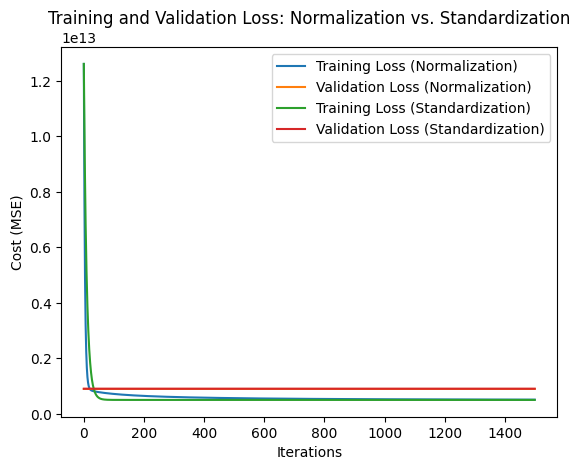

In [6]:

#  Select features
features = ['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom', 'basement',
            'hotwaterheating', 'airconditioning', 'parking', 'prefarea']
X = data[features]
y = data['price'].values

# 3. One-hot encode categorical variables (Binary features)
binary_features = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']
X[binary_features] = X[binary_features].replace({'yes': 1, 'no': 0})


# Function to train, validate, and plot the model
def train_and_plot(X_train, y_train, X_val, y_val, alpha, iterations, scaler_type):
    theta = np.zeros(X_train.shape[1])
    theta, cost_history_train = gradient_descent(X_train, y_train, theta, alpha, iterations)

    # Compute validation loss over the iterations
    validation_loss_history = []
    for i in range(iterations):
        val_loss = compute_validation_loss(X_val, y_val, theta)
        validation_loss_history.append(val_loss)

    # Plot the training and validation loss
    plt.plot(range(iterations), cost_history_train, label=f'Training Loss ({scaler_type})')
    plt.plot(range(iterations), validation_loss_history, label=f'Validation Loss ({scaler_type})')
    return theta

# 4. Normalize input features
scaler_norm = MinMaxScaler()
X_normalized = scaler_norm.fit_transform(X)

# 5. Standardize input features
scaler_std = StandardScaler()
X_standardized = scaler_std.fit_transform(X)

# 6. Add intercept term (column of ones) for both normalized and standardized datasets
X_normalized = np.hstack((np.ones((X_normalized.shape[0], 1)), X_normalized))
X_standardized = np.hstack((np.ones((X_standardized.shape[0], 1)), X_standardized))

# 7. Split into training and validation sets
X_train_norm, X_val_norm, y_train_norm, y_val_norm = train_test_split(X_normalized, y, test_size=0.2, random_state=42)
X_train_std, X_val_std, y_train_std, y_val_std = train_test_split(X_standardized, y, test_size=0.2, random_state=42)

# 8. Set learning rate and iterations
alpha = 0.05
iterations = 1500

# 9. Train and plot models with normalized data
theta_norm = train_and_plot(X_train_norm, y_train_norm, X_val_norm, y_val_norm, alpha, iterations, "Normalization")

# 10. Train and plot models with standardized data
theta_std = train_and_plot(X_train_std, y_train_std, X_val_std, y_val_std, alpha, iterations, "Standardization")

# 11. Finalize the plot
plt.xlabel('Iterations')
plt.ylabel('Cost (MSE)')
plt.title('Training and Validation Loss: Normalization vs. Standardization')
plt.legend()
plt.show()


<ipython-input-8-a166ffedeafb>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[binary_features] = X[binary_features].replace({'yes': 1, 'no': 0})


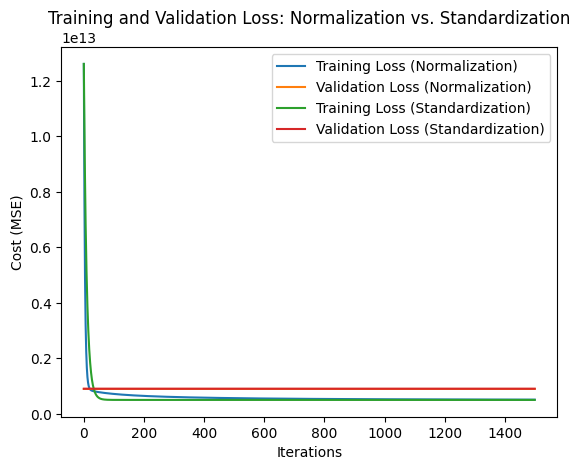

In [8]:

# Select relevant features and the target
features = ['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom', 'basement',
            'hotwaterheating', 'airconditioning', 'parking', 'prefarea']
X = data[features]
y = data['price'].values

# One-hot encode categorical variables (Binary features)
binary_features = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']
X[binary_features] = X[binary_features].replace({'yes': 1, 'no': 0})

# Function to train, validate, and plot the model
def train_and_plot(X_train, y_train, X_val, y_val, alpha, iterations, scaler_type):
    theta = np.zeros(X_train.shape[1])
    theta, cost_history_train = gradient_descent(X_train, y_train, theta, alpha, iterations)

    # Compute validation loss over the iterations
    validation_loss_history = []
    for i in range(iterations):
        val_loss = compute_validation_loss(X_val, y_val, theta)
        validation_loss_history.append(val_loss)

    # Plot the training and validation loss
    plt.plot(range(iterations), cost_history_train, label=f'Training Loss ({scaler_type})')
    plt.plot(range(iterations), validation_loss_history, label=f'Validation Loss ({scaler_type})')
    return theta

# Normalize input features
scaler_norm = MinMaxScaler()
X_normalized = scaler_norm.fit_transform(X)

# Standardize input features
scaler_std = StandardScaler()
X_standardized = scaler_std.fit_transform(X)

# Add intercept term (column of ones) for both normalized and standardized datasets
X_normalized = np.hstack((np.ones((X_normalized.shape[0], 1)), X_normalized))
X_standardized = np.hstack((np.ones((X_standardized.shape[0], 1)), X_standardized))

# Split into training and validation sets
X_train_norm, X_val_norm, y_train_norm, y_val_norm = train_test_split(X_normalized, y, test_size=0.2, random_state=42)
X_train_std, X_val_std, y_train_std, y_val_std = train_test_split(X_standardized, y, test_size=0.2, random_state=42)

# Set learning rate and iterations
alpha = 0.05
iterations = 1500

# Train and plot models with normalized data
theta_norm = train_and_plot(X_train_norm, y_train_norm, X_val_norm, y_val_norm, alpha, iterations, "Normalization")

# Train and plot models with standardized data
theta_std = train_and_plot(X_train_std, y_train_std, X_val_std, y_val_std, alpha, iterations, "Standardization")

# Finalize the plot
plt.xlabel('Iterations')
plt.ylabel('Cost (MSE)')
plt.title('Training and Validation Loss: Normalization vs. Standardization')
plt.legend()
plt.show()


Validation Loss (With Regularization): 900912986296.0923


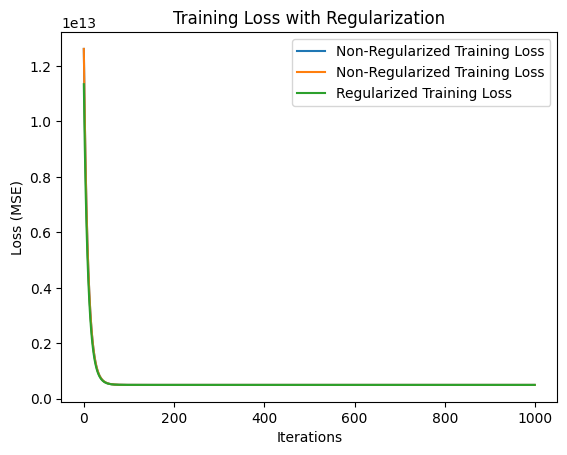

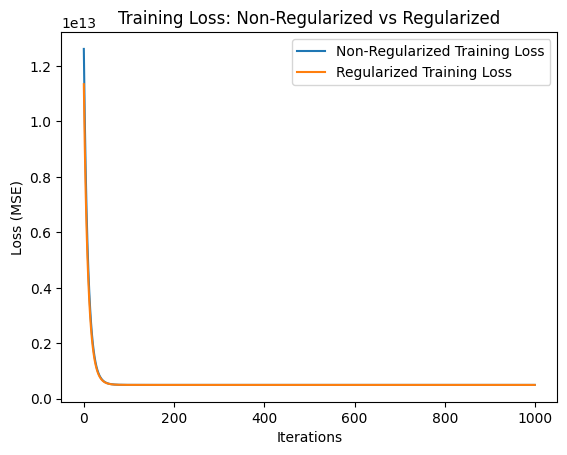

Validation Loss (Non-Regularized): 900396859844.1757
Validation Loss (With Regularization): 900912986296.0923


In [15]:
def compute_cost_with_regularization(X, y, theta, lambda_reg):
    m = len(y)
    predictions = X.dot(theta)
    errors = predictions - y
    cost = (1/(2*m)) * np.sum(errors**2)

    # Add regularization term (ignore theta[0] for intercept)
    reg_term = (lambda_reg / (2 * m)) * np.sum(np.square(theta[1:]))

    return cost + reg_term

def gradient_descent_with_regularization(X, y, theta, alpha, iterations, lambda_reg):
    m = len(y)
    cost_history = []

    for i in range(iterations):
        predictions = X.dot(theta)
        errors = predictions - y
        gradient = (1/m) * X.T.dot(errors)

        # Apply regularization (ignore theta[0] for intercept)
        theta[0] = theta[0] - alpha * gradient[0]  # No regularization for theta_0
        theta[1:] = theta[1:] * (1 - alpha * lambda_reg / m) - alpha * gradient[1:]

        # Compute cost with regularization
        cost = compute_cost_with_regularization(X, y, theta, lambda_reg)
        cost_history.append(cost)

    return theta, cost_history
    # Set regularization parameter (lambda)
lambda_reg = 0.1

# Initialize theta to zero for regularized training
theta_reg = np.zeros(X_train_std.shape[1])

# Train the model with regularization
theta_reg, cost_history_reg = gradient_descent_with_regularization(
    X_train_std, y_train, theta_reg, alpha=0.05, iterations=1000, lambda_reg=lambda_reg
)

# Compute validation loss for regularized model
validation_loss_reg = compute_cost_with_regularization(X_val_std, y_val, theta_reg, lambda_reg)
print("Validation Loss (With Regularization):", validation_loss_reg)

# Problem 2a: Training without Regularization
# Initialize theta to zero for non-regularized training
theta_std = np.zeros(X_train_std.shape[1])

# Train the model without regularization
theta_std, cost_history_std = gradient_descent(
    X_train_std, y_train, theta_std, alpha=0.05, iterations=1000
)

# Compute validation loss for non-regularized model
validation_loss_std = compute_cost(X_val_std, y_val, theta_std)

# Plot training loss for non-regularized model
plt.plot(range(1000), cost_history_std, label='Non-Regularized Training Loss')
# Initialize theta to zero
theta_std = np.zeros(X_train_std.shape[1])  # Standardized inputs assumed best

# Train model using gradient descent without regularization
theta_std, cost_history_std = gradient_descent(
    X_train_std, y_train_std, theta_std, alpha=0.05, iterations=1000
)

# Plot training loss for non-regularized model
plt.plot(range(1000), cost_history_std, label='Non-Regularized Training Loss')
    # Set regularization parameter (lambda)
lambda_reg = 0.1  # You can try different values like 0.01, 0.1, 1

# Initialize theta to zero
theta_reg = np.zeros(X_train_std.shape[1])  # Assuming standardization is best

# Perform gradient descent with regularization
theta_reg, cost_history_reg = gradient_descent_with_regularization(
    X_train_std, y_train_std, theta_reg, alpha=0.05, iterations=1000, lambda_reg=lambda_reg
)

# Plot training loss with regularization
plt.plot(range(1000), cost_history_reg, label='Regularized Training Loss')
plt.xlabel('Iterations')
plt.ylabel('Loss (MSE)')
plt.title('Training Loss with Regularization')
plt.legend()
plt.show()
# Assuming you have cost_history_std and cost_history_reg from earlier
plt.plot(range(1000), cost_history_std, label='Non-Regularized Training Loss')
plt.plot(range(1000), cost_history_reg, label='Regularized Training Loss')
plt.xlabel('Iterations')
plt.ylabel('Loss (MSE)')
plt.title('Training Loss: Non-Regularized vs Regularized')
plt.legend()
plt.show()

# Compare validation losses
print("Validation Loss (Non-Regularized):", validation_loss_std)
print("Validation Loss (With Regularization):", validation_loss_reg)

Validation Loss (With Regularization): 12744576997290.865


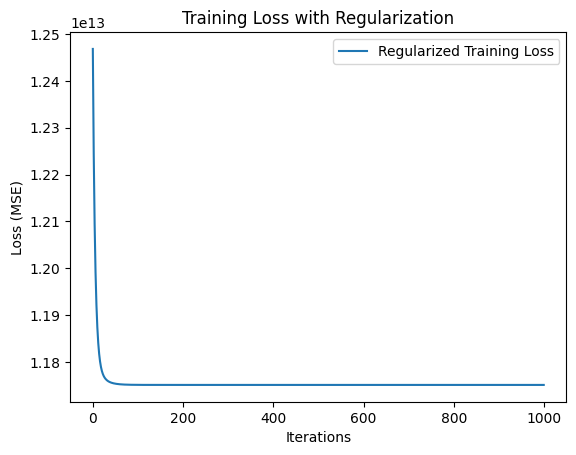

In [17]:

# Select input features and target
X = data[['area', 'bedrooms', 'bathrooms', 'stories', 'parking']].values
y = data['price'].values

# Split the dataset into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the inputs
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_val_std = scaler.transform(X_val)

# Set regularization parameter (lambda)
lambda_reg = 0.1

# Initialize theta to zero for regularized training
theta_reg = np.zeros(X_train_std.shape[1])

# Train the model with regularization
theta_reg, cost_history_reg = gradient_descent_with_regularization(
    X_train_std, y_train, theta_reg, alpha=0.05, iterations=1000, lambda_reg=lambda_reg
)

# Compute validation loss for regularized model
validation_loss_reg = compute_cost(X_val_std, y_val, theta_reg)  # No penalty here
print("Validation Loss (With Regularization):", validation_loss_reg)

# Plotting the training loss
plt.plot(range(1000), cost_history_reg, label='Regularized Training Loss')

# Add labels and legend
plt.xlabel('Iterations')
plt.ylabel('Loss (MSE)')
plt.title('Training Loss with Regularization')
plt.legend()
plt.show()
